In [1]:

from  acq import *
from  wrangle_mall import *

df = get_mallcustomer_data()



In [3]:
# automatically do df.head to examine the first pieces of info


In [4]:
df.head()


,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.isnull().sum(axis=1)


customer_id
1      0
2      0
3      0
4      0
5      0
      ..
196    0
197    0
198    0
199    0
200    0
Length: 200, dtype: int64

In [7]:
num_missing = df.isnull().sum(axis=1)


In [8]:
prnt_miss = num_missing / df.shape[1] * 100


In [9]:
rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prnt_miss})


In [10]:
df.isnull().sum()


gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [11]:
nulls_by_row(df)


,num_cols_missing,percent_cols_missing,count
0,0,0.0,200


In [12]:
nulls_by_col(df)        


,num_rows_missing,percent_rows_missing
gender,0,0.0
age,0,0.0
annual_income,0,0.0
spending_score,0,0.0


In [13]:
summarize(df)


DataFrame head: 

             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
4            Female   23             16              77
5            Female   31             17              40
----------
DataFrame info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
----------
Dataframe Description: 

              age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>, <AxesSubplot:>]],
      dtype=object)

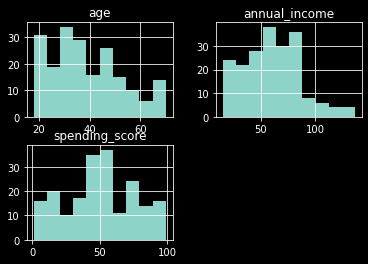

In [14]:
df.hist()


In [15]:
plt.tight_layout()

plt.show()


<Figure size 432x288 with 0 Axes>

In [16]:
get_upper_outliers(df.annual_income)    


customer_id
1      0.00
2      0.00
3      0.00
4      0.00
5      0.00
       ... 
196    0.00
197    0.00
198    0.00
199    4.25
200    4.25
Name: annual_income, Length: 200, dtype: float64

In [17]:
df = add_upper_outlier_columns(df)


In [18]:
outlier_cols = [col for col in df.columns if col.endswith('outliers')]


In [19]:
outlier_cols


['age_upper_outliers',
 'annual_income_upper_outliers',
 'spending_score_upper_outliers']

In [20]:
for col in outlier_cols:
    print(col, ': \n')
    subset = df[col][df[col] > 0]
    print(subset.describe())


age_upper_outliers : 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age_upper_outliers, dtype: float64
annual_income_upper_outliers : 

count    2.00
mean     4.25
std      0.00
min      4.25
25%      4.25
50%      4.25
75%      4.25
max      4.25
Name: annual_income_upper_outliers, dtype: float64
spending_score_upper_outliers : 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: spending_score_upper_outliers, dtype: float64


In [21]:
int(round(.5 * len(df.index), 0))


100

In [22]:
len(df.index)


200

In [23]:
df.shape[0]





200